/Users/maryamyousefian/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


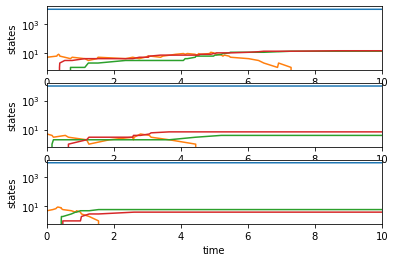

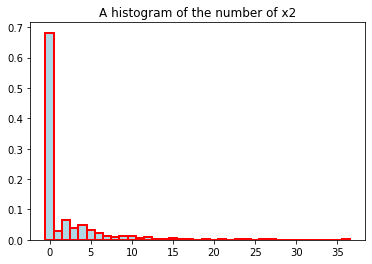

infections that died out: 682 and the probability that the infection is still ongoing at T = 10:  0.31799999999999995


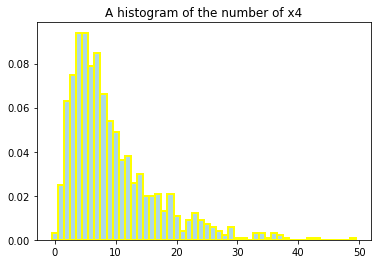

died individuals on average (± standard deviation): 9.329 ± 7.055831559780888


In [1]:
#Task number one, Epodemiological model
#student name: Maryam yousefian

# part(a): Write a program implementing this model and generate trajectories using the SSA:
# part (b): Plot the trajectories for N = 3 simulations up to time T = 10.

# part(c): Perform N = 1000 simulations, generate a histogram of the number of x2 at time T = 10 and depict 
#the probability that 0, . . . , 20 individuals are infected by T = 10.
## QUESTION: What is the probability that the infection is still ongoing at T = 10?

# part(d): From the N = 1000 simulations, generate a histogram of the number of x4 at time T = 10 (number of 
#casualties), depicting the probability that 0, . . . , 35 individuals 
#died by T = 10. 
## QUESTION: How many individuals died on average (± standard deviation)?

#import the required libraries:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Parameter values are:
lamda=1*10**-4
delta=1*10**-8
beta=5*10**-5
kr=0.3

#define the gilespie SSA function:
def gilespie_epodemiological(x0,tf):

    #stoichiometric vector:
    Nr=np.array([[1, 0, 0, 0],[-1, 0, 0, 0],[-1, 1, 0, 0],[0, -1, 0, 1],[0, -1, 1, 0],[0, 0, -1, 0]])
    #Nr=np.array([[1, -1, -1, 0, 0, 0],[0, 0, 1, -1, -1, 0],[0, 0, 0, 1, 0, 0],[0, 0, 0, 0, 1, -1]])
    #Nr= np.transpose(Nr) 
    
    #current state and time:
    x=x0
    t=0
    #create lists to save the visited states and times:
    tvec=[] 
    #append the previous time to the created list tvec:
    tvec.append(t) 
    X=[]
    #append the visited states to the created list X:
    X.append(x0) 
                   
    i=1
    while (t<tf):
        
        i=i+1
        
        #propensities based on what I calculated on paper:
        alpha=np.array([lamda,delta*x[0],beta*x[0]*x[1],(3*10**7)*delta*x[1],kr*x[1],delta*x[2]])
        
        for j in range(0,6,1):
            #remove unfeasible reactions(negative copy numbers):
            if (np.amin(x+Nr[j])<0): 
                alpha[j]=0
        #total reaction intensity
        W=np.sum(alpha)
        if (W==0):
            #warning('negative copy number occurs')
            break 
        if (W>0):
            # tau calculation, the time that the next reaction happens: 
            tau=-np.log(np.random.uniform(0,1,1))/W  
            Wrand=W*np.random.uniform(0,1,1)
            r=np.searchsorted(np.cumsum(alpha),Wrand)
            
            # put while loop to ignore the non-feasible ractions when alpha is zero:
            while alpha[r]==0:   
                r=r+1
            #update state vector using Nr:
            x_new=x+Nr[r]    
            x=x_new[0,:]
            
            #update the time by calculating the tau:
            t=t+tau 
            
            #append the new state and time to previous created lists X and tvec:
            X.append(x)
            tvec.append(t)
            
    return X,tvec

#initial value setting:
x0=[lamda/delta,5,0,0]

#final simulation time determination:
tf=10

# generate the first figure with 3 plots:
for traj in range(1,4,1):   
    xx,tt=gilespie_epodemiological(x0,tf)
    plt.subplot(3,1,traj)
    plt.plot(tt,xx)
    plt.yscale('log')
    plt.xlim(0,tf)
    plt.xlabel('time')
    plt.ylabel('states')
plt.show()
x2=np.zeros(1000)
x4=np.zeros(1000)
for traj in range (0,1000,1):  
    xx,tt=gilespie_epodemiological(x0,tf)
    y=np.array(xx[len(tt)-1]).reshape((1,4))
    x2[traj]=y[0][1]
    x4[traj]=y[0][3]
    
# generate the second figure it is a histogram belongs to the num of x2:
bins=np.linspace(min(x2)-0.5,max(x2)+0.5,int(max(x2)-min(x2)+2))
plt.hist(x2,bins,density=True,label='x2',color = "lightblue", ec="red", lw=2)
plt.title('A histogram of the number of x2')
plt.show()
#probabilities:
num_zeros=len(np.where(x2==0)[0])
prob=1-num_zeros/len(x2)
print('infections that died out:',num_zeros,
      'and the probability that the infection is still ongoing at T = 10: ',prob)

# generate the last figure is a histogram belongs to the num of x4:
bins=np.linspace(min(x4)-0.5,max(x4)+0.5,int(max(x4)-min(x4)+2))
plt.hist(x4,bins,density=True,label='x4',color = "lightblue", ec="yellow", lw=2)
plt.title('A histogram of the number of x4')
plt.show()
print('died individuals on average (± standard deviation):',np.mean(x4),'±',np.std(x4))